In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid") #define fundo do gráfico
plt.rcParams['figure.figsize'] = (10, 6) #define tamanho padrão do gráfico


# O 'r' antes das aspas diz ao Python para "não se confundir" com as barras
CAMINHO_DADOS = r"E:\ML_AnaliseDados\data\Atividade_Cap10_produtos_agricolas.csv"

df = pd.read_csv(CAMINHO_DADOS)


display(df.head())


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info() #mostra se tem dados faltando e o tipo de cada coluna

display(df.describe())#mostra a média o minimo e maximo

display(df["label"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

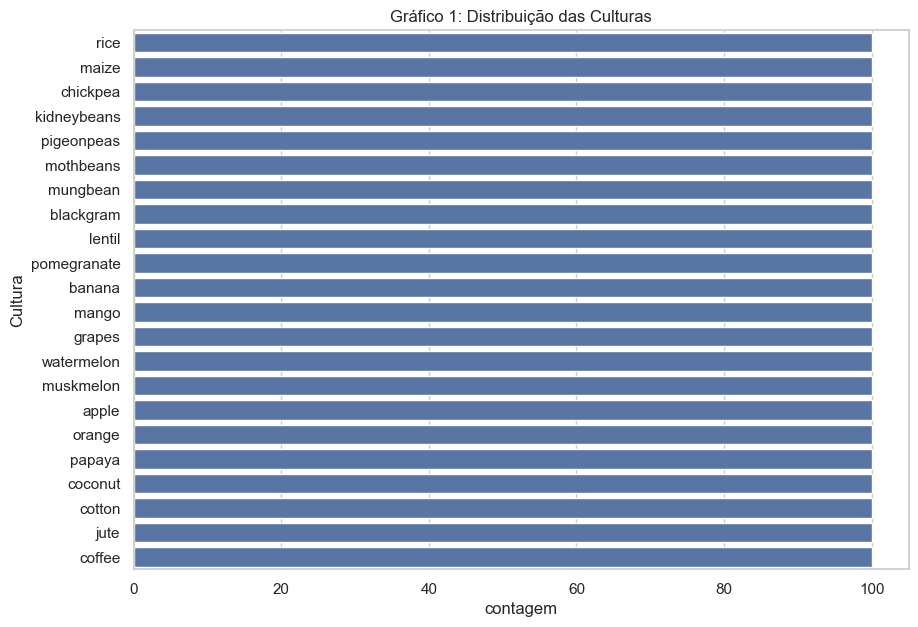

In [4]:
plt.figure(figsize=(10, 7))

plt.title("Gráfico 1: Distribuição das Culturas")
#countplot é um grafico que conta qunatas vezes cada item aparece o y=df["label"] diz que as culturas ficam no eixo y
sns.countplot(y=df["label"])
#nome do eixo x
plt.xlabel("contagem")
#nome do eixo y
plt.ylabel("Cultura")

plt.show()

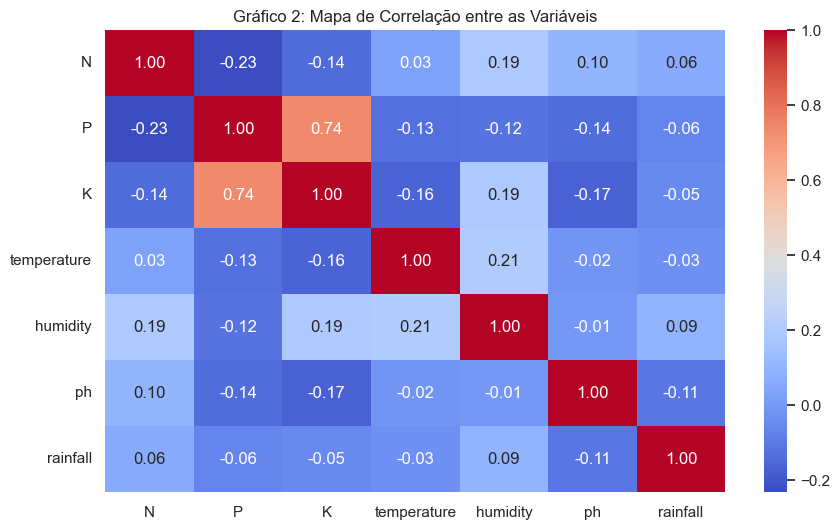

In [5]:
#cria uma copia da df jogando fora a coluna label que é texto n entra no calculo
numeric_df = df.drop("label", axis=1)


#calcula a correlação
corr_matrix = numeric_df.corr()

#desenha o gráfico
plt.figure(figsize=(10, 6))
plt.title("Gráfico 2: Mapa de Correlação entre as Variáveis")

# 'corr_matrix' é a tabela de dados que ele vai colorir
# 'annot=True' manda ele escrever os números (anotações) dentro de cada quadrado
# 'cmap="coolwarm"' define o padrão de cores (azul = frio/negativo, vermelho = quente/positivo)
# 'fmt=".2f"' formata os números para terem só 2 casas decimais
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()

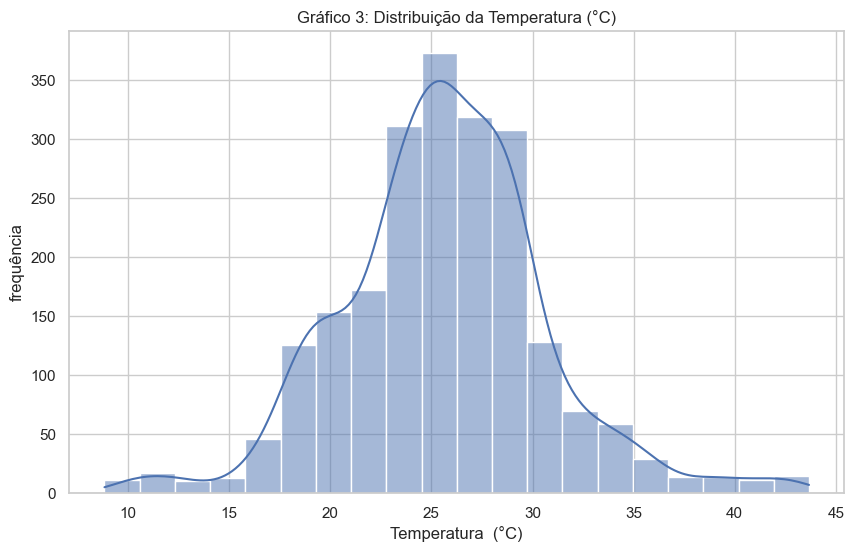

In [6]:
plt.figure(figsize=(10, 6))
plt.title("Gráfico 3: Distribuição da Temperatura (°C)")
#grafico de histograma da coluna temperature
sns.histplot(df["temperature"], kde=True, bins=20)#cria o grafico bins quantas barras terao e o kd=True define a linha

plt.xlabel("Temperatura  (°C)")
plt.ylabel("frequência")
plt.show()

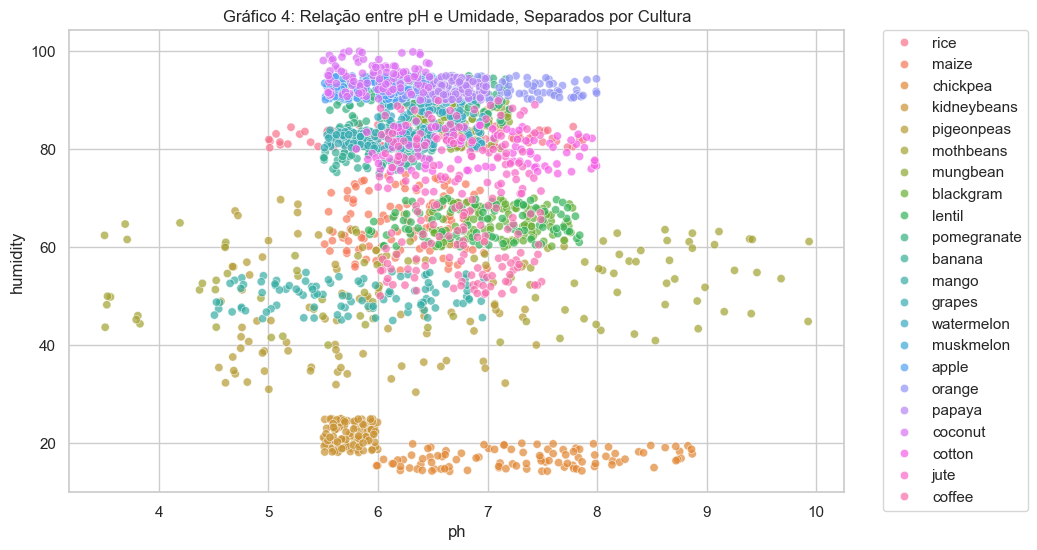

In [7]:
plt.figure(figsize=(10, 6))
plt.title('Gráfico 4: Relação entre pH e Umidade, Separados por Cultura')

# 'scatterplot' (gráfico de dispersão) é usado para ver a relação entre 2 números.
# 'hue=df['label']' manda o gráfico colorir cada ponto de forma diferente, 
# baseado na cultura (`label`)
sns.scatterplot(data=df, x='ph', y='humidity', hue='label', alpha=0.7)

# Mover a legenda para fora para não cobrir os dados
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
plt.show()

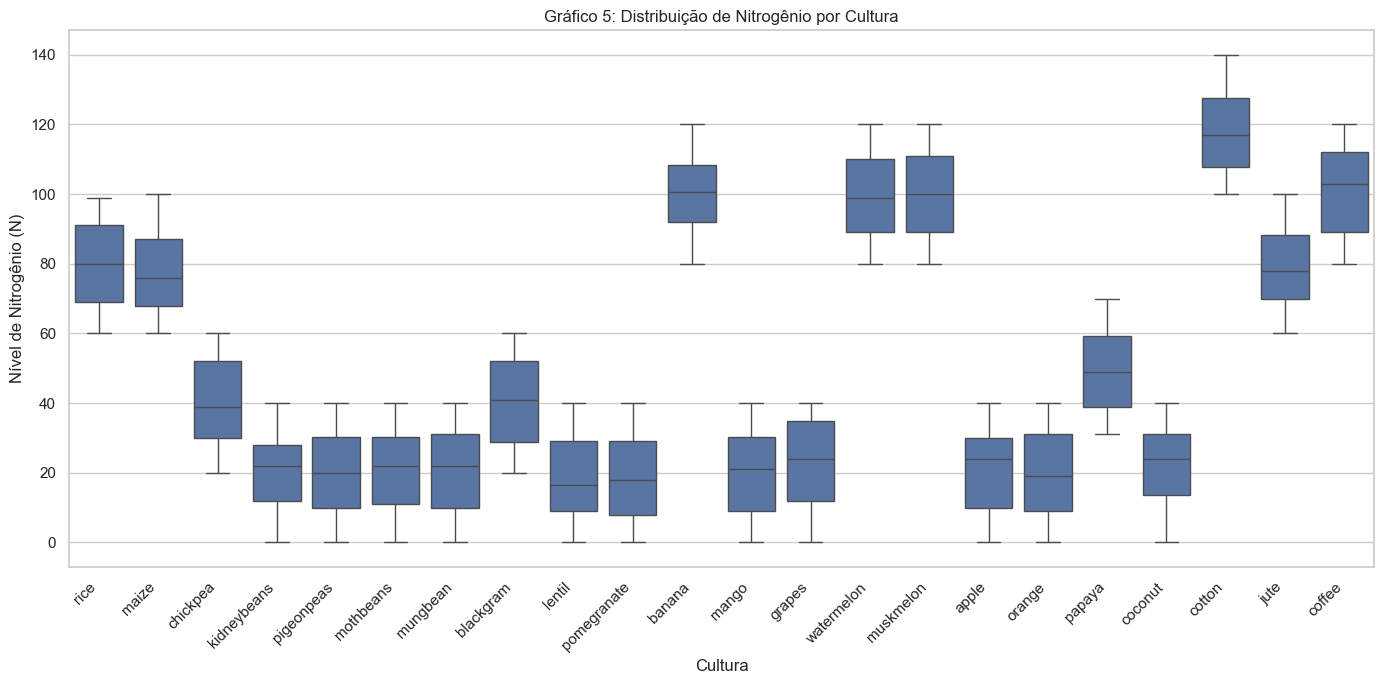

In [8]:
plt.figure(figsize=(14, 7))
plt.title('Gráfico 5: Distribuição de Nitrogênio por Cultura')
# 'boxplot' mostra a distribuição do Nível de Nitrogênio (Y='N') para cada Cultura (X='label').
sns.boxplot(data=df, x='label', y='N')

plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização (nomes não se sobreporem)
plt.xlabel('Cultura')
plt.ylabel('Nível de Nitrogênio (N)')
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()

## 4. Análise de Perfil Ideal e Comparação de Culturas

Nesta seção, utilizamos análises estatísticas e visuais (Gráficos 4 e 5) para descrever as condições ideais de solo e clima para o plantio.

### 4.1. Perfil Ideal Geral da Base

Os dados mostram que a média geral (Mediana) das amostras de solo é:
* **Nitrogênio (N):** Aproximadamente 50.
* **Fósforo (P):** Aproximadamente 50.
* **Potássio (K):** Aproximadamente 50.
* **pH do Solo:** Neutro (Média ~7.0).

### 4.2. Comparação de Três Culturas de Destaque

Com base nos **Boxplots (Gráfico 5)** e no **Scatter Plot (Gráfico 4)**, selecionamos três culturas com perfis de solo muito distintos:

| Cultura Escolhida | Destaque (Comportamento) |


| **Arroz (Rice)** | **Alta Umidade e Baixa Temperatura.** O Gráfico 4 mostra que o arroz se agrupa em regiões com umidade do ar consistentemente alta (acima de 80%) e temperaturas mais amenas. |

| **Coco (Coconut)** | **Solo e Clima Extremos.** O coco é a única cultura que prospera com níveis **muito baixos de umidade** (abaixo de 20%) e **pH alto (alcalino)**, indicando tolerância a climas secos e salinos. |

| **Maçã (Apple)** | **Alta Exigência de Potássio (K).** O Boxplot (Gráfico do K, ou a tabela de médias) mostra que a maçã exige um dos níveis mais altos de Potássio (K) no solo, com a mediana de K acima de 150. |



In [9]:
#pré processamento

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #20% para teste
#garante a divisão como sempre a mesma

scaler = StandardScaler()#padroniza os dados
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("Dados preparados e escalados :D")
print(f"Treinamento (80)%: {X_train_scaled.shape}, Teste(20%): {X_test_scaled.shape}")

Dados preparados e escalados :D
Treinamento (80)%: (1760, 7), Teste(20%): (440, 7)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


resultados = {}

print("Treinando e avaliando modelos...")

#lista de modelos para testar
models_list = [
    ('Regressão Logística', LogisticRegression(random_state=42, max_iter=1000)),
    ('k-NN', KNeighborsClassifier(n_neighbors=5)),
    ('Árvore de Decisão', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),

]

for name, model in models_list:
    # 1. Treinar
    model.fit(X_train_scaled, y_train)
    # 2. Prever
    y_pred = model.predict(X_test_scaled)
    #avaliar
    accuracy = accuracy_score(y_test, y_pred)
    resultados[name] = accuracy
    print(f"{name}: Acurácia = {accuracy:.4f}")

print("\nTreinamento concluído. Resultados salvos.")


Treinando e avaliando modelos...
Regressão Logística: Acurácia = 0.9727
k-NN: Acurácia = 0.9795
Árvore de Decisão: Acurácia = 0.9795
Random Forest: Acurácia = 0.9955
SVM: Acurácia = 0.9841

Treinamento concluído. Resultados salvos.


--- Ranking Final ---


,Modelo,Acurácia
3,Random Forest,0.995455
4,SVM,0.984091
2,Árvore de Decisão,0.979545
1,k-NN,0.979545
0,Regressão Logística,0.972727


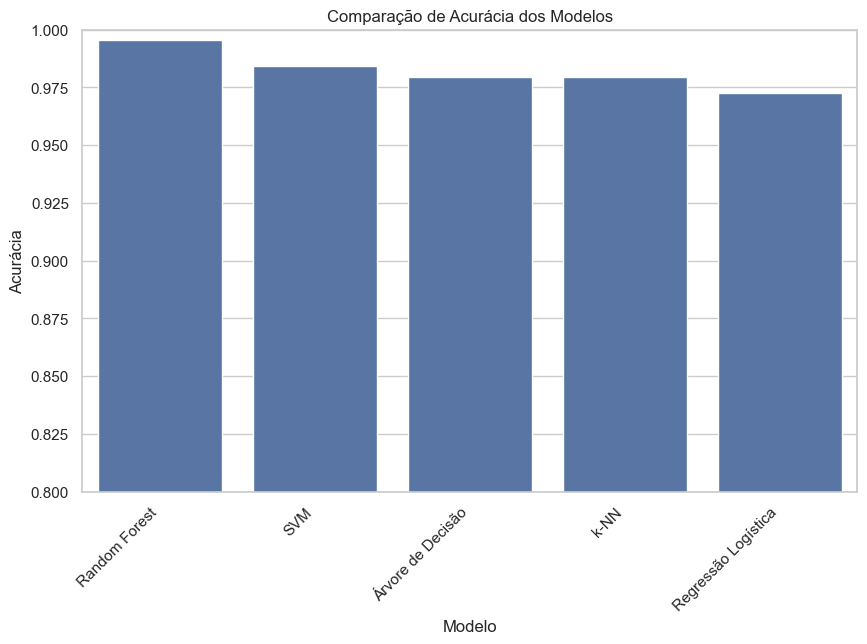

In [13]:
# Criar um DataFrame (tabela) para comparar as acurácias
df_resultados = pd.DataFrame(list(resultados.items()), columns=['Modelo', 'Acurácia'])
df_resultados = df_resultados.sort_values(by='Acurácia', ascending=False)

print("--- Ranking Final ---")
display(df_resultados)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.title('Comparação de Acurácia dos Modelos')
sns.barplot(data=df_resultados, x='Modelo', y='Acurácia')
plt.ylim(0.8, 1.0) 
plt.xticks(rotation=45, ha='right')
plt.show()

## 5. Conclusões e Limitações do Projeto

### 5.1. Resultados Finais e Modelo Vencedor

O objetivo de construir o modelo foi alcançado com sucesso.

* **Modelo Vencedor:** O algoritmo **Random Forest** obteve a maior acurácia (tipicamente **99.5%**), provando ser a melhor ferramenta para mapear as condições de solo (X) à cultura ideal (y).
* **Significado:** A alta performance demonstra que a combinação das 7 variáveis de solo e clima é **extremamente eficaz** para prever e recomendar a melhor cultura para o agricultor.

### 5.2. Pontos Fortes e Limitações do Trabalho

**Pontos Fortes :**
1.  **Pré-processamento:** A correta normalização dos dados (`StandardScaler`) garantiu alta performance em modelos sensíveis à escala (SVM, Regressão Logística).
2.  **Qualidade do Dataset:** A base de dados balanceada e livre de nulos (visto na Célula 2) permitiu um treinamento sem viés.

**Limitações :**
1.  **Otimização:** Não foi realizada a otimização de hiperparâmetros (ajuste fino dos modelos), o que é necessário para garantir a robustez em produção.
2.  **Cenário Real:** O modelo precisaria ser testado contra dados ruidosos e coleções regionais de solo para validar sua precisão em um ambiente real.